In [1]:
#Inzidenzen der symptomatischen und hospitalisierten COVID-19-Fälle nach Impfstatus
#Datenquelle: https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/Inzidenz_Impfstatus.html
#Stand: 04.01.2022

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.ticker import StrMethodFormatter

In [2]:
#Fehlende Werte erkennen
missing_values = ["--"]

In [3]:
#Einlesen der Daten
symp = pd.read_excel("Inzidenz_Impfstatus/Inzidenz_Impfstatus.xlsx", sheet_name = 'Symptomatische_nach_Impfstatus', skiprows = 3, na_values = missing_values)
hosp = pd.read_excel("Inzidenz_Impfstatus/Inzidenz_Impfstatus.xlsx", sheet_name = 'Hospitalisierte_nach_Impfstatus', skiprows = 3, na_values = missing_values)

In [4]:
#Vorläufig!!!: Meldejahr entfernen
hosp.drop(['Meldejahr'], axis=1,inplace=True)
symp.drop(['Meldejahr'], axis=1,inplace=True)

In [5]:
#Tabelle formatieren
symp_melt = pd.melt(symp, 'Meldewoche', var_name='Art', 
              value_name='Inzidenz')

In [6]:
#Tabelle formatieren
hosp_melt = pd.melt(hosp, 'Meldewoche', var_name='Art', 
              value_name='Inzidenz')
hosp_melt['Meldewoche'] = hosp_melt['Meldewoche'].astype(int)

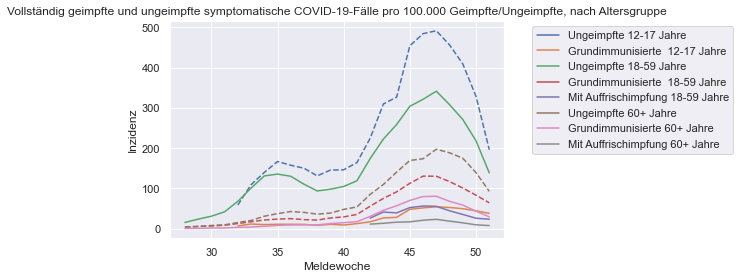

In [7]:
#Visualisierung symptomatische COVIS-19-Fälle
sns.set_theme(style="darkgrid")
symp_vis = sns.lineplot(x="Meldewoche", y="Inzidenz", hue="Art", data=symp_melt)
symp_vis.set_title("Vollständig geimpfte und ungeimpfte symptomatische COVID-19-Fälle pro 100.000 Geimpfte/Ungeimpfte, nach Altersgruppe")

#Ungeimpfte gestrichelt
symp_vis.lines[0].set_linestyle("--")
symp_vis.lines[3].set_linestyle("--")
symp_vis.lines[5].set_linestyle("--")
symp_vis.legend(loc='upper right', bbox_to_anchor=(1.7, 1))

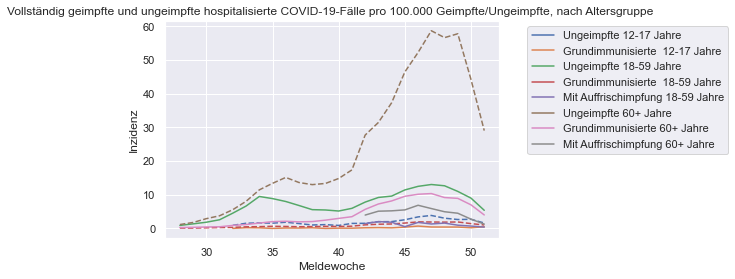

In [8]:
#Visualisierung
sns.set_theme(style="darkgrid")
hosp_vis = sns.lineplot(x="Meldewoche", y="Inzidenz", hue="Art", data=hosp_melt)
hosp_vis.set_title("Vollständig geimpfte und ungeimpfte hospitalisierte COVID-19-Fälle pro 100.000 Geimpfte/Ungeimpfte, nach Altersgruppe ")

#Ungeimpfte gestrichelt
hosp_vis.lines[0].set_linestyle("--")
hosp_vis.lines[3].set_linestyle("--")
hosp_vis.lines[5].set_linestyle("--")

hosp_vis.legend(loc='upper right', bbox_to_anchor=(1.7, 1))

In [9]:
#Nach Altersklassen
alter12_17 = hosp_melt.loc[(hosp_melt['Art'] == "Ungeimpfte 12-17 Jahre") | (hosp_melt['Art'] == "Grundimmunisierte  12-17 Jahre")]
alter18_59 = hosp_melt.loc[(hosp_melt['Art'] == "Ungeimpfte 18-59 Jahre") | (hosp_melt['Art'] == "Grundimmunisierte  18-59 Jahre") | (hosp_melt['Art'] == "Mit Auffrischimpfung 18-59 Jahre")]
alter60p = hosp_melt.loc[(hosp_melt['Art'] == "Ungeimpfte 60+ Jahre") | (hosp_melt['Art'] == "Grundimmunisierte 60+ Jahre") | (hosp_melt['Art'] == "Mit Auffrischimpfung 60+ Jahre")]

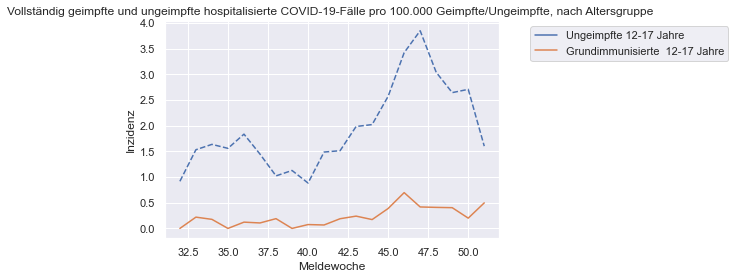

In [10]:
#Visualisierung 12 b 17
sns.set_theme(style="darkgrid")
hosp_vis = sns.lineplot(x="Meldewoche", y="Inzidenz", hue="Art", data=alter12_17)
hosp_vis.set_title("Vollständig geimpfte und ungeimpfte hospitalisierte COVID-19-Fälle pro 100.000 Geimpfte/Ungeimpfte, nach Altersgruppe ")

#Ungeimpfte gestrichelt
hosp_vis.lines[0].set_linestyle("--")
hosp_vis.lines[1].set_linestyle("-")

hosp_vis.legend(loc='upper right', bbox_to_anchor=(1.7, 1))

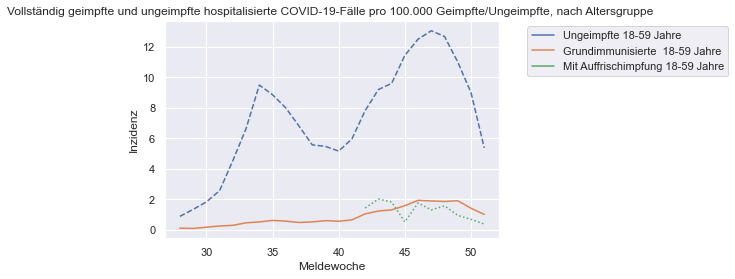

In [11]:
#Visualisierung 18 b 59
sns.set_theme(style="darkgrid")
hosp_vis = sns.lineplot(x="Meldewoche", y="Inzidenz", hue="Art", data=alter18_59)
hosp_vis.set_title("Vollständig geimpfte und ungeimpfte hospitalisierte COVID-19-Fälle pro 100.000 Geimpfte/Ungeimpfte, nach Altersgruppe ")

#Ungeimpfte gestrichelt
hosp_vis.lines[0].set_linestyle("--")
hosp_vis.lines[1].set_linestyle("-")
hosp_vis.lines[2].set_linestyle(":")

hosp_vis.legend(loc='upper right', bbox_to_anchor=(1.7, 1))

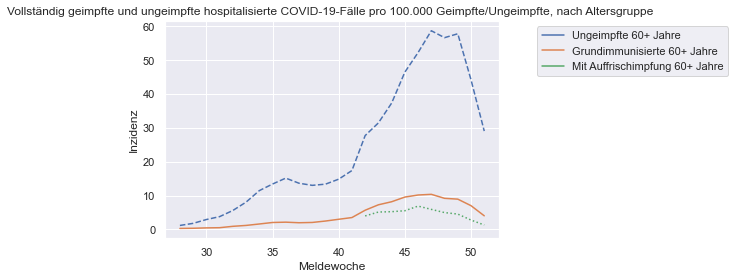

In [12]:
#Visualisierung 60p
sns.set_theme(style="darkgrid")
hosp_vis = sns.lineplot(x="Meldewoche", y="Inzidenz", hue="Art", data=alter60p)
hosp_vis.set_title("Vollständig geimpfte und ungeimpfte hospitalisierte COVID-19-Fälle pro 100.000 Geimpfte/Ungeimpfte, nach Altersgruppe ")

#Ungeimpfte gestrichelt
hosp_vis.lines[0].set_linestyle("--")
hosp_vis.lines[1].set_linestyle("-")
hosp_vis.lines[2].set_linestyle(":")

hosp_vis.legend(loc='upper right', bbox_to_anchor=(1.7, 1))